In [1]:
# importando módulos criados
from dados_repos import *
from manipula_repos import *

In [2]:
# instanciando um objeto
repo_linguagens = ManipulaRepositorios('ccampa896')
nome_repo = 'linguagens-utilizadas'

# Adicionando arquivos salvos no repositório criado
repo_linguagens.add_arquivo(nome_repo, 'linguagens_netflix.csv', 'dados_csv/linguagens_netflix.csv')
repo_linguagens.add_arquivo(nome_repo, 'linguagens_spotify.csv', 'dados_csv/linguagens_spotify.csv')
repo_linguagens.add_arquivo(nome_repo, 'linguagens_apple.csv', 'dados_csv/linguagens_apple.csv')

status_code upload do arquivo: 422
status_code upload do arquivo: 422
status_code upload do arquivo: 422


# Análise de Dados após ETL
Após a fase de ETL desenvolvido durante o curso, faremos uma pequena análise de dados, simulando a finalidade de ter os pipelines de dados. Vamos manipular os dados para extrair a seguinte informação: quais as linguagens que as empresas estudadas mais utilizam, comparando quais são essas linguagens. 
O estudo simula por exemplo, uma tendência dessas empresas para futuros empregados saberem quais são as tecnologias mais utilizadas.

In [2]:
import pandas as pd

# Lendo os arquivos CSV e transformando as informações em DataFrame, para a correta manipulação e limpeza/tratamento
# dos dados

# valores nulos substituídos por NaN no momento da leitura dos arquivos com o parâmetro 'na_values'

df_amzn = pd.read_csv('dados_csv/linguagens_amzn.csv', na_values=[''])
df_netflix = pd.read_csv('dados_csv/linguagens_netflix.csv', na_values=[''])
df_apple = pd.read_csv('dados_csv/linguagens_apple.csv', na_values=[''])
df_spotify = pd.read_csv('dados_csv/linguagens_spotify.csv', na_values=[''])

In [3]:
# Exemplo
df_amzn

,Unnamed: 0,nome,linguagem
0,0,.github,NaN
1,1,ads-advanced-tools-docs,NaN
2,2,ads-pao-amznjs-gtm-template,Smarty
3,3,alexa-coho,JavaScript
4,4,alexa-skills-kit-js,NaN
...,...,...,...
138,138,zeek-plugin-enip,Zeek
139,139,zeek-plugin-profinet,Zeek
140,140,zeek-plugin-s7comm,Zeek
141,141,zeek-plugin-tds,Zeek


In [4]:
# Substituir os valores NaN por 'Sem linguagem'
df_amzn['linguagem'].fillna('Sem linguagem', inplace=True)
df_netflix['linguagem'].fillna('Sem linguagem', inplace=True)
df_apple['linguagem'].fillna('Sem linguagem', inplace=True)
df_spotify['linguagem'].fillna('Sem linguagem', inplace=True)

In [5]:
df_amzn.columns

Index(['Unnamed: 0', 'nome', 'linguagem'], dtype='object')

In [6]:
# Exemplo 
df_amzn

,Unnamed: 0,nome,linguagem
0,0,.github,Sem linguagem
1,1,ads-advanced-tools-docs,Sem linguagem
2,2,ads-pao-amznjs-gtm-template,Smarty
3,3,alexa-coho,JavaScript
4,4,alexa-skills-kit-js,Sem linguagem
...,...,...,...
138,138,zeek-plugin-enip,Zeek
139,139,zeek-plugin-profinet,Zeek
140,140,zeek-plugin-s7comm,Zeek
141,141,zeek-plugin-tds,Zeek


In [7]:
# Exemplo de tratamento
df_amzn.drop('Unnamed: 0', axis=1, inplace=True)
df_amzn

,nome,linguagem
0,.github,Sem linguagem
1,ads-advanced-tools-docs,Sem linguagem
2,ads-pao-amznjs-gtm-template,Smarty
3,alexa-coho,JavaScript
4,alexa-skills-kit-js,Sem linguagem
...,...,...
138,zeek-plugin-enip,Zeek
139,zeek-plugin-profinet,Zeek
140,zeek-plugin-s7comm,Zeek
141,zeek-plugin-tds,Zeek


In [8]:
df_netflix.drop('Unnamed: 0', axis=1, inplace=True)
df_spotify.drop('Unnamed: 0', axis=1, inplace=True)
df_apple.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_apple

,nome,linguagem
0,app-store-server-library-java,Java
1,app-store-server-library-node,TypeScript
2,app-store-server-library-python,Python
3,app-store-server-library-swift,Swift
4,apple-llvm-infrastructure-tools,C++
...,...,...
228,tensorflow_macos,Shell
229,turicreate,C++
230,unityplugins,C#
231,VideoFlashingReduction,Mathematica


In [10]:
df_spotify

,nome,linguagem
0,.github,Sem linguagem
1,aioshumway,Python
2,android-auth,HTML
3,android-sdk,HTML
4,android-store-service,Python
...,...,...
258,web-scripts,TypeScript
259,web-scripts-library-template,TypeScript
260,XCMetrics,Swift
261,XCRemoteCache,Swift


In [11]:
df_netflix

,nome,linguagem
0,.github,Sem linguagem
1,aegisthus,Java
2,af_tsa,C
3,aminator,Python
4,apache-pyiceberg,Java
...,...,...
217,x-element,JavaScript
218,x-test,JavaScript
219,yetch,JavaScript
220,zeno,Java


In [12]:
df_amzn.columns

Index(['nome', 'linguagem'], dtype='object')

In [13]:
amzn = df_amzn.groupby('linguagem').count().reset_index()
amzn

,linguagem,nome
0,C,3
1,C#,6
2,C++,3
3,CSS,1
4,Go,2
5,HTML,2
6,Java,19
7,JavaScript,11
8,Jupyter Notebook,4
9,Kotlin,3


In [14]:
amzn.columns

Index(['linguagem', 'nome'], dtype='object')

In [15]:
amzn.rename(columns={'nome': 'Quantidade de Repositório'}, inplace=True)
amzn

,linguagem,Quantidade de Repositório
0,C,3
1,C#,6
2,C++,3
3,CSS,1
4,Go,2
5,HTML,2
6,Java,19
7,JavaScript,11
8,Jupyter Notebook,4
9,Kotlin,3


In [16]:
amzn.sort_values('Quantidade de Repositório', inplace=True, ascending=False)
amzn

,linguagem,Quantidade de Repositório
13,Python,41
6,Java,19
18,Swift,12
7,JavaScript,11
11,PHP,9
16,Sem linguagem,9
19,TypeScript,6
1,C#,6
20,Zeek,5
8,Jupyter Notebook,4


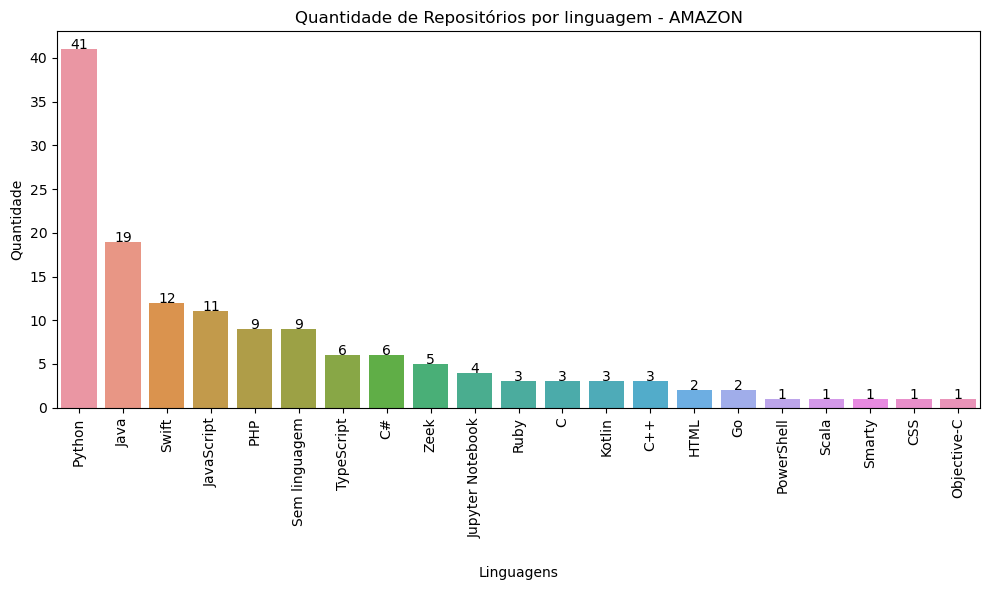

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico (opcional)
sns.barplot(x='linguagem', y='Quantidade de Repositório', data=amzn)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Repositórios por linguagem - AMAZON') 
plt.xlabel('Linguagens', labelpad=20)
plt.ylabel('Quantidade')

# Rotacionar os rótulos do eixo x para ficarem verticais
plt.xticks(rotation=90)

# Adicionar números em cima das barras
for index, value in enumerate(amzn['Quantidade de Repositório']):
    plt.text(index, value, str(value), ha='center')
    
# Ajustar o layout para garantir que tudo caiba na figura
plt.tight_layout()
    
# Salvar o gŕafico em arquivo PNG
plt.savefig('amazon.png')

# Mostrar o gráfico
plt.show()


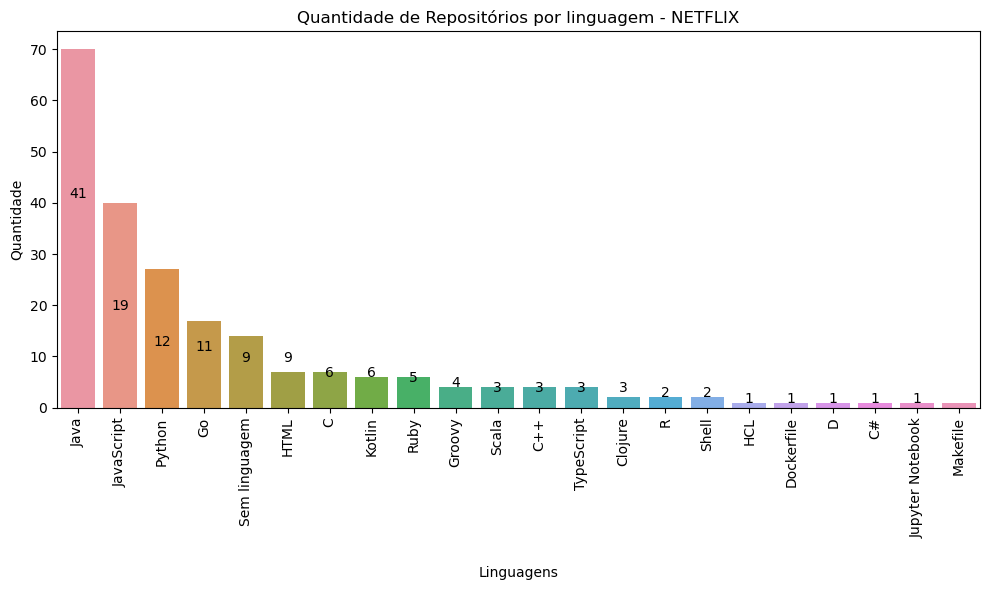

In [26]:
netflix = df_netflix.groupby('linguagem').count().reset_index()
netflix.rename(columns={'nome': 'Quantidade de Repositório'}, inplace=True)
netflix.sort_values('Quantidade de Repositório', inplace=True, ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico (opcional)
sns.barplot(x='linguagem', y='Quantidade de Repositório', data=netflix)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Repositórios por linguagem - NETFLIX') 
plt.xlabel('Linguagens', labelpad=20)
plt.ylabel('Quantidade')

# Rotacionar os rótulos do eixo x para ficarem verticais
plt.xticks(rotation=90)

# Adicionar números em cima das barras
for index, value in enumerate(amzn['Quantidade de Repositório']):
    plt.text(index, value, str(value), ha='center')
    
# Ajustar o layout para garantir que tudo caiba na figura
plt.tight_layout()
    
# Salvar o gŕafico em arquivo PNG
plt.savefig('netflix.png')

# Mostrar o gráfico
plt.show()


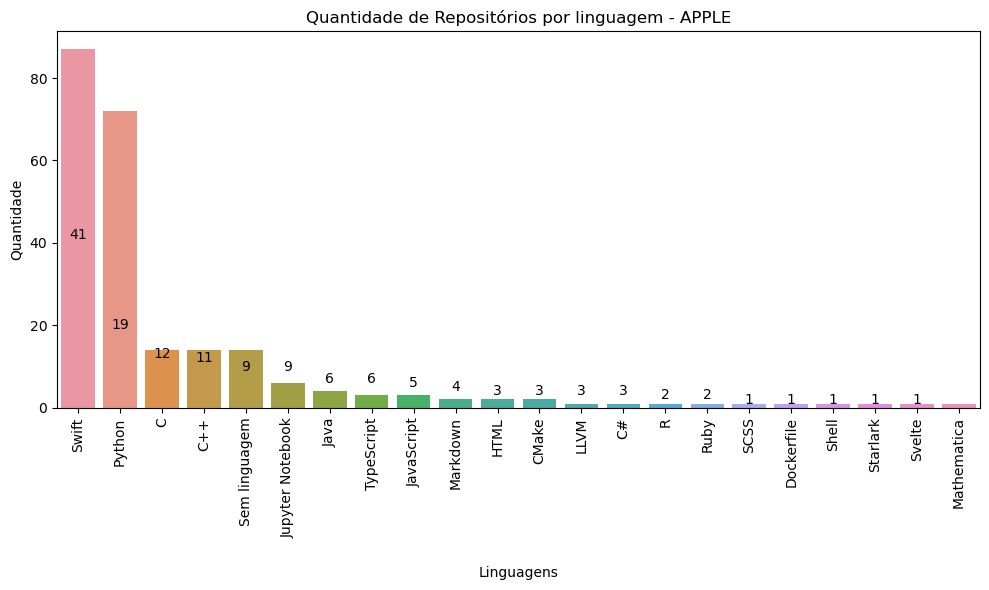

In [27]:
apple = df_apple.groupby('linguagem').count().reset_index()
apple.rename(columns={'nome': 'Quantidade de Repositório'}, inplace=True)
apple.sort_values('Quantidade de Repositório', inplace=True, ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico (opcional)
sns.barplot(x='linguagem', y='Quantidade de Repositório', data=apple)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Repositórios por linguagem - APPLE') 
plt.xlabel('Linguagens', labelpad=20)
plt.ylabel('Quantidade')

# Rotacionar os rótulos do eixo x para ficarem verticais
plt.xticks(rotation=90)

# Adicionar números em cima das barras
for index, value in enumerate(amzn['Quantidade de Repositório']):
    plt.text(index, value, str(value), ha='center')

# Ajustar o layout para garantir que tudo caiba na figura
plt.tight_layout()
    
# Salvar o gŕafico em arquivo PNG
plt.savefig('apple.png')

# Mostrar o gráfico
plt.show()

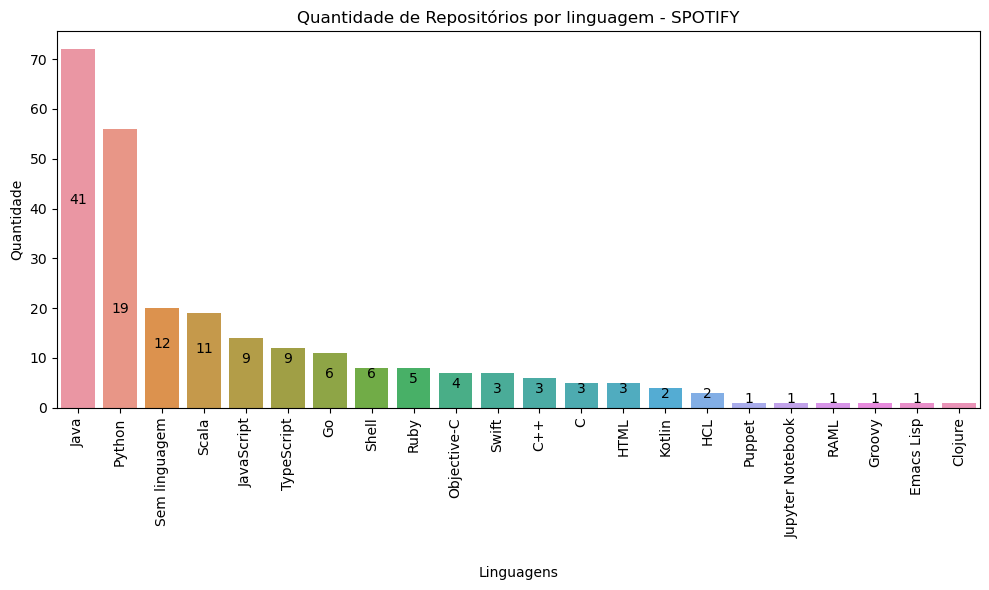

In [28]:
spotify = df_spotify.groupby('linguagem').count().reset_index()
spotify.rename(columns={'nome': 'Quantidade de Repositório'}, inplace=True)
spotify.sort_values('Quantidade de Repositório', inplace=True, ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico (opcional)
sns.barplot(x='linguagem', y='Quantidade de Repositório', data=spotify)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Repositórios por linguagem - SPOTIFY') 
plt.xlabel('Linguagens', labelpad=20)
plt.ylabel('Quantidade')

# Rotacionar os rótulos do eixo x para ficarem verticais
plt.xticks(rotation=90)

# Adicionar números em cima das barras
for index, value in enumerate(amzn['Quantidade de Repositório']):
    plt.text(index, value, str(value), ha='center')

# Ajustar o layout para garantir que tudo caiba na figura
plt.tight_layout()
    
# Salvar o gŕafico em arquivo PNG
plt.savefig('spotify.png')

# Mostrar o gráfico
plt.show()